In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [30]:
data=pd.read_csv('E:\datascience\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [31]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [32]:
data.shape

(1470, 35)

In [33]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [34]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [35]:
data=data.drop(columns={'EmployeeCount'})
data=data.drop(columns={'Over18'})
data=data.drop(columns={'EmployeeNumber'})
data=data.drop(columns={'StandardHours'})

<AxesSubplot:>

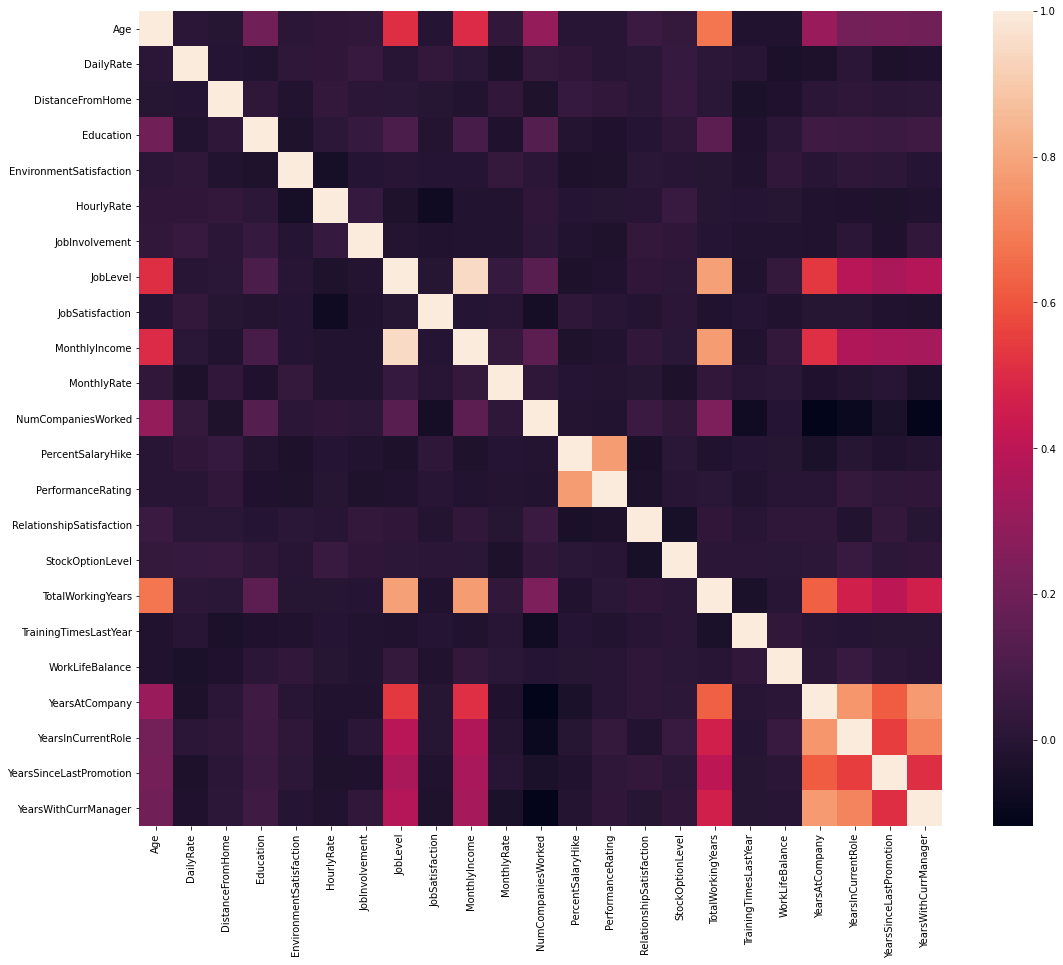

In [36]:
plt.figure(figsize=(18,15))
sns.heatmap(data.corr(),annot=False)

In [37]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [38]:
data=data.replace({'Attrition':{'Yes':0,'No':1},'BusinessTravel':{'Travel_Rarely':0,'Travel_Frequently':1,'Non-Travel':2},'Department':{'Human Resources':0,'Sales':1,'Research & Development':2},'EducationField':{'Life Sciences':0,'Medical':1,'Marketing':2,'Technical Degree':3,'Human Resources':4,'Other':5},'Gender':{'Male':0,'Female':1},'OverTime':{'Yes':0,'No':1},'JobRole':{'Sales Executive':0,'Research Scientist':1,'Laboratory Technician':2,'Healthcare Representative':3,'Manufacturing Director':4,'Manager':5,'Sales Representative':6,'Research Director':7,'Human Resources':8},'MaritalStatus':{'Single':0,'Married':1,'Divorced':2}})

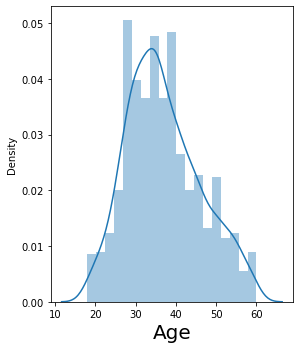

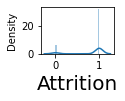

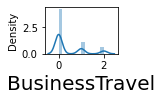

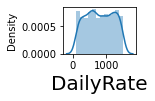

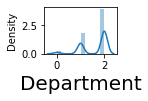

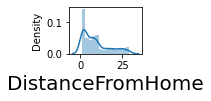

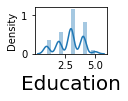

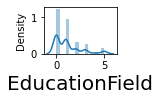

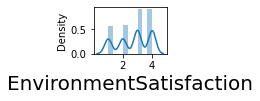

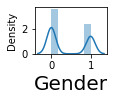

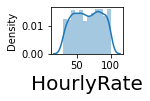

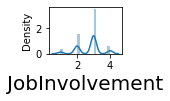

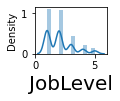

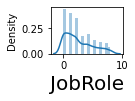

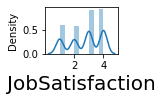

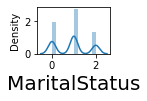

ValueError: num must be 1 <= num <= 16, not 17

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<24:
        ax=plt.subplot(4,4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
    plt.show()

In [45]:
df-features=data.drop('Attrition',axis=1)

SyntaxError: cannot assign to operator (<ipython-input-45-3cb33d440118>, line 1)

In [43]:
x=data.drop(columns=['Attrition'])
y=data['Attrition']

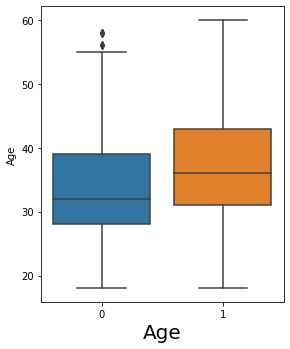

KeyError: 'Attrition'

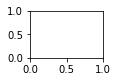

In [46]:
plt.figure(figsize=(20,25))
graph=1

for column in data:
    if plotnumber<24:
        ax=plt.subplot(4,4, graph)
        sns.boxplot(y,x[column])
        plt.xlabel(column, fontsize=20)
        
    graph+=1
    plt.show()

In [24]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [25]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

In [26]:
vif

,vif,Features
0,2.053877,Age
1,1.016635,BusinessTravel
2,1.022309,DailyRate
3,1.082234,Department
4,1.017634,DistanceFromHome
5,1.066939,Education
6,1.056499,EducationField
7,1.020548,EnvironmentSatisfaction
8,1.018667,Gender
9,1.022118,HourlyRate


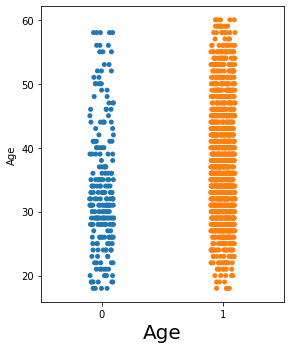

KeyError: 'Attrition'

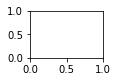

In [47]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<24:
        ax=plt.subplot(4,4, plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
    plt.show()

In [49]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.25, random_state=355)

In [50]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_pred=log_reg.predict(x_test)

In [52]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [53]:
accuracy=accuracy_score(y_test,y_pred)

accuracy

0.8614130434782609

In [54]:
conf_mat=confusion_matrix(y_test,y_pred)

conf_mat

array([[ 18,  43],
       [  8, 299]], dtype=int64)

In [55]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [56]:
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)

In [57]:
Accuracy

0.8614130434782609

In [58]:
Precison=true_positive/(true_positive+false_positive)
Precison

0.29508196721311475

In [59]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.6923076923076923

In [60]:
F1_score=2*(Recall*Precison)/(Recall+Precison)
F1_score

0.41379310344827586

In [61]:
auc=roc_auc_score(y_test,y_pred)
print(auc)

0.6345116676456453


In [62]:
fpr,tpr, thresholds=roc_curve(y_test,y_pred)

In [63]:
fpr

array([0.        , 0.70491803, 1.        ])

In [64]:
tpr

array([0.        , 0.97394137, 1.        ])

In [65]:
thresholds

array([2, 1, 0], dtype=int64)

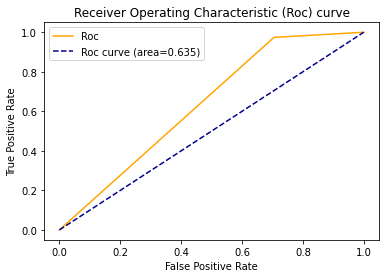

In [66]:
plt.plot(fpr, tpr, color='Orange',label='Roc')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Roc curve (area=%0.3f)'%auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Roc) curve')

plt.legend()

plt.show()